In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
dataset_path = '../data/brain_tumor_dataset'
train_dir = os.path.join(dataset_path, 'Training')
test_dir = os.path.join(dataset_path, 'Testing')

class_names = ['glioma', 'meningioma', 'pituitary', 'notumor']
img_size = 150 

In [12]:
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label)
    return images, labels

def load_dataset(base_path):
    images = []
    labels = []
    for i, category in enumerate(class_names):
        category_path = os.path.join(base_path, category)
        imgs, lbls = load_images_from_folder(category_path, i)
        images.extend(imgs)
        labels.extend(lbls)
    return np.array(images), np.array(labels)

X_train, y_train = load_dataset(train_dir)
X_test, y_test = load_dataset(test_dir)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5712, 150, 150, 3)
Test shape: (1311, 150, 150, 3)


In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test_cat))

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 243ms/step - accuracy: 0.6444 - loss: 1.0087 - val_accuracy: 0.8207 - val_loss: 0.4799
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 236ms/step - accuracy: 0.8622 - loss: 0.3814 - val_accuracy: 0.8673 - val_loss: 0.3308
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 225ms/step - accuracy: 0.9176 - loss: 0.2309 - val_accuracy: 0.9222 - val_loss: 0.2272
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.9438 - loss: 0.1707 - val_accuracy: 0.9321 - val_loss: 0.2063
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9558 - loss: 0.1205 - val_accuracy: 0.9108 - val_loss: 0.2226
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 221ms/step - accuracy: 0.9660 - loss: 0.0995 - val_accuracy: 0.9306 - val_loss: 0.2197
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 0.9745 - loss: 0.0776 - val_accuracy: 0.9565 - val_loss: 0.1492
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 228ms/step - accuracy: 0.9814 - loss: 0

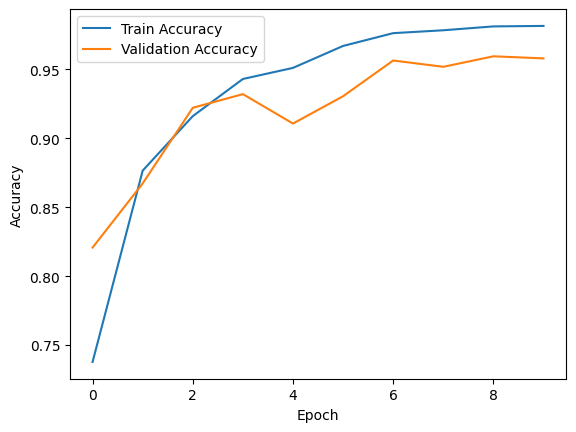

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
model.save('../models/brain_tumor_cnn.keras')    
print("Model saved!")

Model saved!
